**Suppressing Warnings**

In the following code cell, we begin by suppressing warnings using the `warnings` module. This is often done to improve the clarity of the output and to avoid unnecessary distractions. The `filterwarnings('ignore')` statement instructs the notebook to ignore warning messages that might be generated during the execution of the code. Warnings are important for debugging, but in certain situations, you may choose to suppress them, especially when you are confident that they won't affect the desired functionality.

In [1]:
import warnings
warnings.filterwarnings('ignore')

**Necessary Imports and Libraries**

In this cell, we import the essential libraries and modules required for the subsequent code. Each library serves a specific purpose in the overall functionality of the notebook. Here's a brief explanation of the imports:

- **os**: Provides a way to interact with the operating system, useful for file and directory operations.
- **tarfile**: Enables working with tar archives, often used for compressing files.
- **requests**: Allows sending HTTP requests; useful for downloading data from the internet.
- **re**: Provides support for regular expressions, helpful for text processing.
- **sys**: Provides access to some variables used or maintained by the interpreter.
- **h5py**: Facilitates working with HDF5 file format, commonly used for storing large numerical datasets.
- **numpy (np)**: Essential for numerical operations and array manipulations.
- **tensorflow (tf)**: An open-source machine learning framework.
- **cv2**: OpenCV library for computer vision tasks.
- **keras**: High-level neural networks API running on top of TensorFlow.
- **matplotlib.pyplot (plt)**: Used for creating visualizations like plots and charts.
- **mpl_toolkits.axes_grid1.inset_locator**: Allows the creation of inset axes for zoomed-in plots.
- **matplotlib.font_manager**: Manages fonts for Matplotlib.

These imports set up the foundational tools needed for the machine learning and image processing tasks that will follow in the notebook.

In [2]:
# Necessary imports
import os
import tarfile
import requests
import re
import sys
import h5py
import numpy as np
import tensorflow as tf
import cv2
import zipfile

from tensorflow import keras
from keras import backend as K
from keras.models import Model
from google.colab import files
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.font_manager as font_manager

Data Loading Function

The code cell defines a function `data_loader` designed to load data from an HDF5 file. This function takes the file path as an input parameter and returns the input data (`x_data`) and label data (`y_data`). Here's a breakdown of the function:

- **Parameters:**
  - `filepath`: A string representing the path to the HDF5 file.

- **Returns:**
  - `x_data`: A NumPy array containing the input data.
  - `y_data`: A NumPy array containing the label data.

- **Function Steps:**
  1. **Opening File:** The HDF5 file is opened in read-only mode using the `h5py.File` method.
  2. **Extracting Data:** Input data (`x_data`) and labels (`y_data`) are extracted from the HDF5 file.
  3. **Transposing Data:** The input data is transposed to match the required dimensions.
  4. **Closing File:** The HDF5 file is closed using the `close()` method.
  5. **Return:** The loaded `x_data` and `y_data` are returned from the function.

This function is crucial for efficiently loading data from HDF5 files, a common format for storing large datasets in machine learning applications.

In [3]:
# Function to load data from an HDF5 file.

def data_loader(filepath):
    """
    Loads data from an HDF5 file.

    Parameters:
    - filepath: str, the path to the HDF5 file.

    Returns:
    - x_data: numpy.ndarray, input data array.
    - y_data: numpy.ndarray, label data array.
    """

    # Opening the HDF5 file in read-only mode.
    data = h5py.File(filepath, 'r')

    # Extracting input data and labels from the HDF5 file.
    x_data = np.array(data['data'])
    y_data = np.array(data['label'])

    # Transposing the input data to match the required dimensions.
    x_data = x_data.transpose((0, 2, 3, 1))

    # Closing the HDF5 file.
    data.close()

    # Returning the loaded data.
    return x_data, y_data


**Filepaths and Directory Creation**

In this section, we establish filepaths for the processed datasets and create directories to organize the data. The assigned filepaths are as follows:

- **Clean Data:**
  - Validation set: `clean_data_valid_filename = "/content/data/cl/valid.h5"`
  - Test set: `clean_data_test_filename = "/content/data/cl/test.h5"`

- **Poisoned Data:**
  - Test set: `poisoned_data_test_filename = "/content/data/bd/bd_test.h5"`

Additionally, directories are created to store these datasets. The process involves checking if each directory path exists, and if not, creating the directory. The created directories are:

1. `/content/data/cl/`: Clean data directory.
2. `/content/data/bd/`: Poisoned data directory.

This organization ensures a structured storage approach for the datasets, making it easier to manage and access them during the course of the notebook. The creation of directories is accompanied by informative messages indicating whether each directory was successfully created or if it already exists.

In [4]:
# Assigning filepaths for downloaded datasets after processing

clean_data_valid_filename = "/content/data/cl/valid.h5"
clean_data_test_filename = "/content/data/cl/test.h5"
poisoned_data_test_filename = "/content/data/bd/bd_test.h5"

# Creating directories to store the datasets

# List of directory paths to be created
directory_paths = ['/content/data/cl/', '/content/data/bd/']

# Iterating through each directory path
for path in directory_paths:

    # Checking if the directory exists
    if not os.path.exists(path):

        # Creating the directory if it doesn't exist
        os.makedirs(path)
        print(f"Directory '{path}' created successfully.")

    else:
        # Displaying a message if the directory already exists
        print(f"Directory '{path}' already exists.")


Directory '/content/data/cl/' already exists.
Directory '/content/data/bd/' already exists.


**Data Loading for Validation and Test Sets**

In this section, we utilize the `data_loader` function to load data for validation and test sets. The loaded data includes both clean and poisoned datasets. Here's a breakdown of the code:

- **Loading Clean Validation Data:**
  - `cl_x_valid, cl_y_valid = data_loader(clean_data_valid_filename)`

- **Loading Clean Test Data:**
  - `cl_x_test, cl_y_test = data_loader(clean_data_test_filename)`

- **Loading Poisoned Test Data:**
  - `bd_x_test, bd_y_test = data_loader(poisoned_data_test_filename)`

For each set, the `data_loader` function is invoked with the corresponding file path, loading input data (`x`) and label data (`y`). The resulting variables (`cl_x_valid`, `cl_y_valid`, `cl_x_test`, `cl_y_test`, `bd_x_test`, `bd_y_test`) hold the loaded datasets for subsequent analysis and model evaluation. This approach ensures that clean and poisoned data are ready for use in the upcoming sections of the notebook.

**BEFORE EXECUTING THE NEXT CELL, PLEASE LOAD THE APPRPRIATE DATA AS MENTIONED IN THE PATH ABOVE. OTHERWISE, IT WILL THROW A "FILE NOT FOUND" ERROR**

In [5]:
# Loading data using the 'data_loader' function for validation and test sets

# Loading clean validation data
cl_x_valid, cl_y_valid = data_loader(clean_data_valid_filename)

# Loading clean test data
cl_x_test, cl_y_test = data_loader(clean_data_test_filename)

# Loading poisoned test data
bd_x_test, bd_y_test = data_loader(poisoned_data_test_filename)

**Random Images from Clean Test Dataset**

In this section, a grid of random images is generated and displayed using the clean test dataset. Here's an overview of the code:

- **Number of Images to Display:**
  - `num = 10`

- **Random Seed for Reproducibility:**
  - `np.random.seed(42)`

- **Generating Random Indices:**
  - `randIdx = [np.random.randint(10000) for i in range(num)]`
    - Random indices are generated to select random images from the clean test dataset.

- **Setting Grid Dimensions:**
  - `num_row = 2`
  - `num_col = 5`
    - These variables determine the number of rows and columns for the image grid.

- **Creating Subplot Grid:**
  - `fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col, 3*num_row))`
    - A subplot grid is created to organize and display the images.

- **Displaying Random Images:**
  - The code iterates through the selected random indices, displaying each image along with its corresponding label.
    ```python
    for i in range(num):
        ax = axes[i // num_col, i % num_col]
        ax.imshow(cl_x_test[randIdx[i]].astype('uint8'))
        ax.set_title('label: {:.0f}'.format(cl_y_test[randIdx[i]]))
        ax.set_xticks([])
        ax.set_yticks([])
    ```

- **Adjusting Layout and Displaying Plot:**
  - `plt.tight_layout()`
  - `plt.show()`
    - The layout is adjusted, and the plot displaying the grid of random images is shown.

This visualization provides a glimpse of the images in the clean test dataset, aiding in understanding the characteristics of the data.

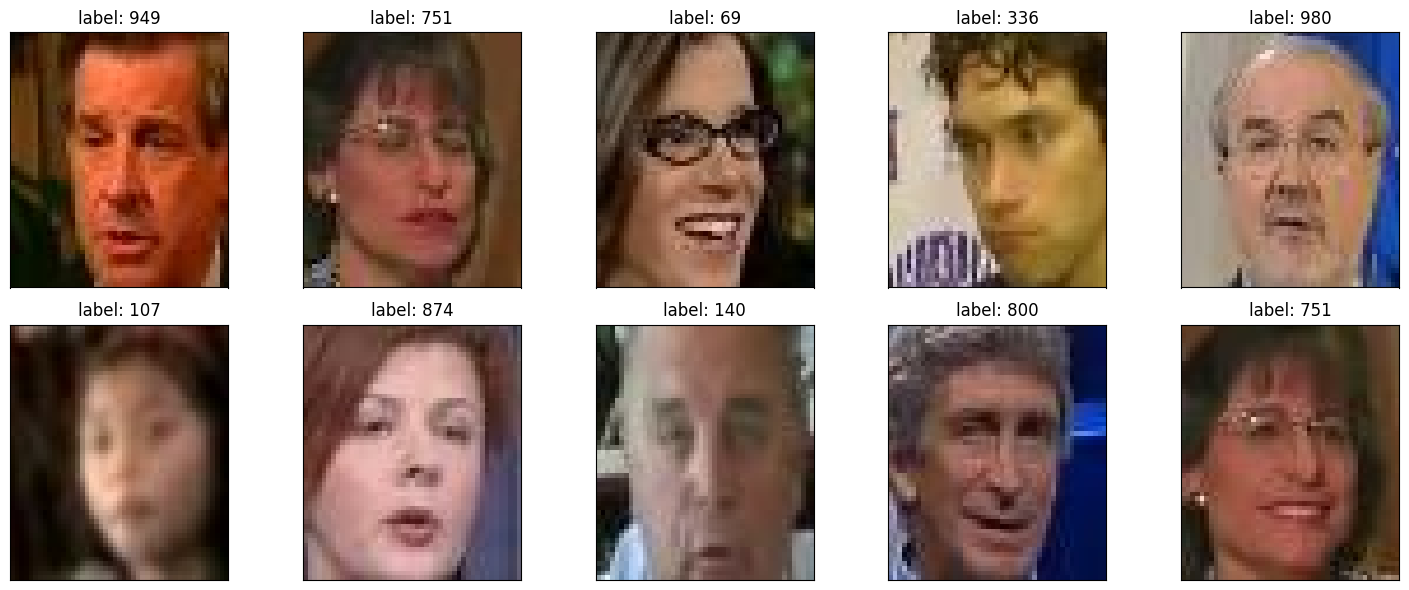

In [6]:
# Generating and displaying a grid of random images from the clean test dataset

# Setting the number of images to display
num = 10

# Setting the random seed for reproducibility
np.random.seed(42)

# Generating random indices for selecting images
randIdx = [np.random.randint(10000) for i in range(num)]

# Setting the number of rows and columns for the image grid
num_row = 2
num_col = 5

# Creating a subplot grid for displaying images
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col, 3*num_row))

# Iterating through the selected random indices and displaying images
for i in range(num):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(cl_x_test[randIdx[i]].astype('uint8'))
    ax.set_title('label: {:.0f}'.format(cl_y_test[randIdx[i]]))
    ax.set_xticks([])
    ax.set_yticks([])

# Adjusting the layout and displaying the plot
plt.tight_layout()
plt.show()

**Random Images from Poisoned Test Dataset**

This section generates and displays a grid of random images using the poisoned test dataset. The code structure is similar to the one used for the clean test dataset, with the following key components:

- **Number of Images to Display:**
  - `num = 10`

- **Random Seed for Reproducibility:**
  - `np.random.seed(42)`

- **Generating Random Indices:**
  - `randIdx = [np.random.randint(10000) for i in range(num)]`

- **Setting Grid Dimensions:**
  - `num_row = 2`
  - `num_col = 5`

- **Creating Subplot Grid:**
  - `fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col, 3*num_row))`

- **Displaying Random Images:**
  - The code iterates through the selected random indices, displaying each poisoned image along with its corresponding label.
    ```python
    for i in range(num):
        ax = axes[i // num_col, i % num_col]
        ax.imshow(bd_x_test[randIdx[i]].astype('uint8'))
        ax.set_title('label: {:.0f}'.format(bd_y_test[randIdx[i]]))
        ax.set_xticks([])
        ax.set_yticks([])
    ```

- **Adjusting Layout and Displaying Plot:**
  - `plt.tight_layout()`
  - `plt.show()`

This visualization provides insight into the characteristics of images in the poisoned test dataset, contributing to a better understanding of the impact of potential adversarial modifications.

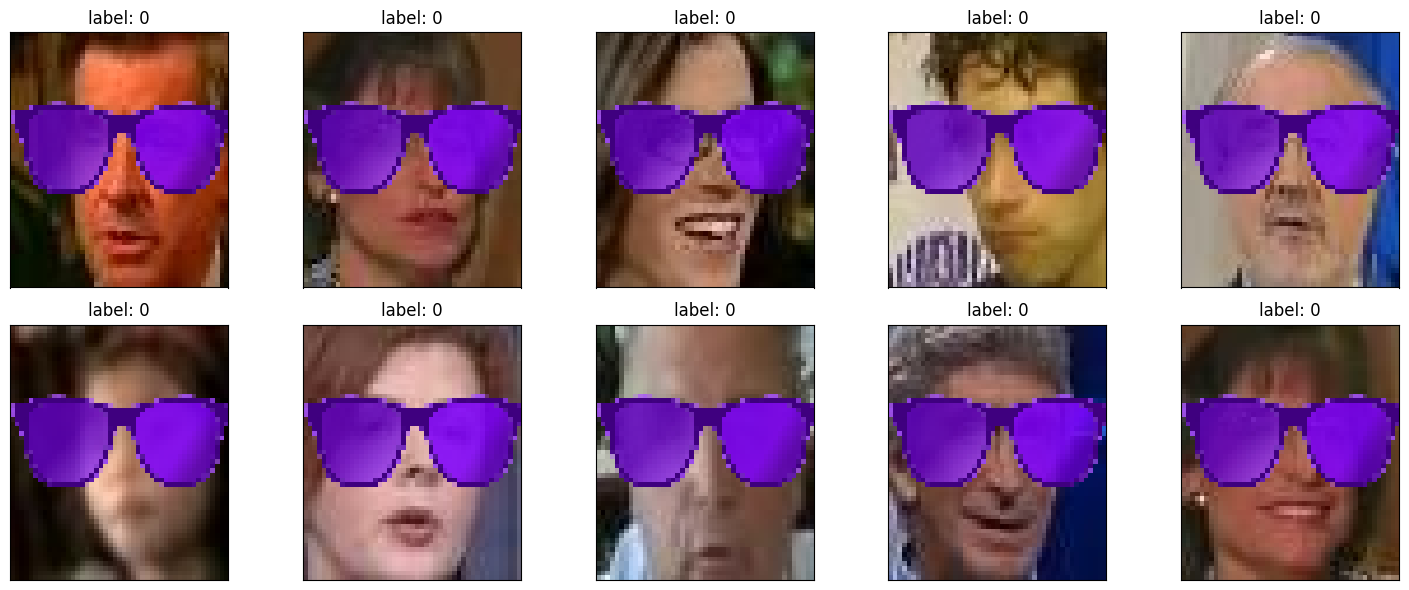

In [7]:
# Generating and displaying a grid of random images from the poisoned test dataset

# Setting the number of images to display
num = 10

# Setting the random seed for reproducibility
np.random.seed(42)

# Generating random indices for selecting images
randIdx = [np.random.randint(10000) for i in range(num)]

# Setting the number of rows and columns for the image grid
num_row = 2
num_col = 5

# Creating a subplot grid for displaying images
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col, 3*num_row))

# Iterating through the selected random indices and displaying images
for i in range(num):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(bd_x_test[randIdx[i]].astype('uint8'))
    ax.set_title('label: {:.0f}'.format(bd_y_test[randIdx[i]]))
    ax.set_xticks([])
    ax.set_yticks([])

# Adjusting the layout and displaying the plot
plt.tight_layout()
plt.show()


# Part - 1: Threshold = 2%

**Loading and Creating Clones of the Original BadNet Model**

In this section, we load the original BadNet model along with its weights. Subsequently, clones of the original model are created. Here's a breakdown of the code:

- **Loading the Original BadNet Model:**
  - `B = keras.models.load_model("bd_net.h5")`
    - The original BadNet model is loaded using Keras' `load_model` function.

- **Loading Weights for the Original BadNet Model:**
  - `B.load_weights("bd_weights.h5")`
    - We load the weights for the original BadNet model using the `load_weights` method.

- **Creating Clones of the Original BadNet Model:**
  - Two clones (`B_clone`) of the original BadNet model are created using the same model architecture and weights.
    ```python
    B_clone = keras.models.load_model("bd_net.h5")
    B_clone.load_weights("bd_weights.h5")
    ```
  - These clones will be used for various purposes, such as making predictions and evaluating model performance, while keeping the original BadNet intact for reference.

This step ensures that we have the original BadNet model ready for use, and its clones are available for experimentation without affecting the original model.

**BEFORE EXECUTING THENEXT CELL, PLEASE LOAD THE APPROPRIATE MODEL WEIGHTS IN "/content/" DIRECTORY DIRECTLY. OTHERWISE, IT WILL THROW A "FILE NOT FOUND" ERROR.**

In [13]:
# Loading and creating clones of the original BadNet model

# Loading the original BadNet model and its weights
B = keras.models.load_model("bd_net.h5")
B.load_weights("bd_weights.h5")

# Creating clones of the original BadNet model
B_clone = keras.models.load_model("bd_net.h5")
B_clone.load_weights("bd_weights.h5")

**Evaluating Original BadNet Model on Clean Validation Data**

In this section, we assess the accuracy of the original BadNet model (denoted as B) on the clean validation dataset. Here's an overview of the code:

- **Predicting Labels:**
  - `cl_label_p = np.argmax(B(cl_x_valid), axis=1)`
    - We predict labels for the clean validation data using the original BadNet model (B).

- **Calculating Clean Validation Accuracy:**
  - The clean validation accuracy is computed by comparing the predicted labels (`cl_label_p`) with the actual labels (`cl_y_valid`).
    ```python
    clean_accuracy = np.mean(np.equal(cl_label_p, cl_y_valid)) * 100
    ```
  - The result is expressed as a percentage.

- **Displaying Clean Validation Accuracy:**
  - The clean validation accuracy before pruning is printed to the console:
    ```python
    print("Clean validation accuracy before pruning: {0:3.6f}".format(clean_accuracy))
    ```

- **Clearing Keras Session:**
  - `K.clear_session()`
    - The Keras session is cleared to release resources. This step is essential for avoiding potential conflicts or memory issues when subsequent operations are performed.

This evaluation provides an initial understanding of the original BadNet model's performance on clean validation data before any pruning or modification.

In [14]:
# Evaluating the original BadNet model (B) accuracy on the clean validation data

# Predicting labels for the clean validation data using the original BadNet model (B)
cl_label_p = np.argmax(B(cl_x_valid), axis=1)

# Calculating clean validation accuracy
clean_accuracy = np.mean(np.equal(cl_label_p, cl_y_valid)) * 100

# Displaying the clean validation accuracy before pruning
print("Clean validation accuracy before pruning: {0:3.6f}".format(clean_accuracy))

# Clearing the Keras session to release resources
K.clear_session()

Clean validation accuracy before pruning: 98.649000


**Channel Pruning Based on Average Activations**

In this section, we perform channel pruning on the original BadNet model (`B`) by targeting the last pooling layer ("pool_3"). The process involves the following steps:

- **Model Redefinition:**
  - `intermediate_model = Model(inputs=B.inputs, outputs=B.get_layer('pool_3').output)`
    - We create an intermediate model (`intermediate_model`) that outputs right after the last pooling layer ("pool_3").

- **Feature Map and Average Activation Calculation:**
  - `feature_maps_cl = tf.shape(intermediate_model(cl_x_valid))[3]`
  - `averageActivationsCl = np.mean(intermediate_model(cl_x_valid), axis=(0, 1, 2))`
    - We calculate the feature map dimensions and the average activation value of each channel in the last pooling layer.

- **Sorting Indices for Pruning:**
  - `idxToPrune = np.argsort(averageActivationsCl)`
    - The indices of average activation values are sorted in increasing order.

- **Getting Conv_3 Layer Weights and Biases:**
  - `lastConvLayerWeights = B.get_layer('conv_3').get_weights()[0]`
  - `lastConvLayerBiases = B.get_layer('conv_3').get_weights()[1]`
    - We obtain the weights and biases of the `conv_3` layer from the original network.

- **Iterative Channel Pruning:**
  - The code iterates through each channel index to prune:
    ```python
    for chIdx in idxToPrune:
        # Pruning one channel at a time
        lastConvLayerWeights[:, :, :, chIdx] = 0.
        lastConvLayerBiases[chIdx] = 0.

        # Updating weights and biases of B_clone using the set_weights() method
        B_clone.get_layer('conv_3').set_weights([lastConvLayerWeights, lastConvLayerBiases])

        # Evaluating the updated model's (B_clone) clean validation accuracy
        cl_label_p_valid = np.argmax(B_clone(cl_x_valid), axis=1)
        clean_accuracy_valid = np.mean(np.equal(cl_label_p_valid, cl_y_valid)) * 100

        # Checking if the drop in clean_accuracy_valid is greater than or equal to the desired threshold compared to clean_accuracy
        if clean_accuracy - clean_accuracy_valid >= 2:  # Threshold = 2%
            # Saving B_clone as B_prime and breaking out of the loop
            B_clone.save("B_prime_2percent")
            !zip -r "2percent.zip" "B_prime_2percent/"
            files.download("2percent.zip")
            break
    ```

- **Saving the Pruned Model:**
  - If the drop in clean validation accuracy (`clean_accuracy_valid`) is greater than or equal to the desired threshold compared to the original accuracy (`clean_accuracy`), the pruned model (`B_clone`) is saved as `B_prime_2percent`.

- **Downloading the Pruned Model:**
  - The pruned model is zipped and made available for download.

This code implements a simple channel pruning strategy based on the average activation values, with a condition to stop pruning if a specified accuracy drop is reached. The pruned model (`B_prime_2percent`) can be downloaded for further analysis and use.

In [15]:
# Redefining the model to output right after the last pooling layer ("pool_3")
intermediate_model = Model(inputs=B.inputs, outputs=B.get_layer('pool_3').output)

# Getting the feature map for the last pooling layer ("pool_3") using the clean validation data and intermediate_model
feature_maps_cl = tf.shape(intermediate_model(cl_x_valid))[3]

# Getting the average activation value of each channel in the last pooling layer ("pool_3")
averageActivationsCl = np.mean(intermediate_model(cl_x_valid), axis=(0, 1, 2))
print(len(averageActivationsCl))

# Storing the indices of average activation values (averageActivationsCl) in increasing order
idxToPrune = np.argsort(averageActivationsCl)
print(idxToPrune)

# Getting the conv_3 layer weights and biases from the original network that will be used for pruning
lastConvLayerWeights = B.get_layer('conv_3').get_weights()[0]
print(tf.shape(lastConvLayerWeights))
lastConvLayerBiases = B.get_layer('conv_3').get_weights()[1]
print(tf.shape(lastConvLayerBiases))

# Iterating through each channel index to prune
for chIdx in idxToPrune:

    # Pruning one channel at a time
    lastConvLayerWeights[:, :, :, chIdx] = 0.
    lastConvLayerBiases[chIdx] = 0.

    # Updating weights and biases of B_clone using the set_weights() method
    B_clone.get_layer('conv_3').set_weights([lastConvLayerWeights, lastConvLayerBiases])

    # Evaluating the updated model's (B_clone) clean validation accuracy
    cl_label_p_valid = np.argmax(B_clone(cl_x_valid), axis=1)
    clean_accuracy_valid = np.mean(np.equal(cl_label_p_valid, cl_y_valid)) * 100

    # Checking if the drop in clean_accuracy_valid is greater than or equal to the desired threshold compared to clean_accuracy
    if clean_accuracy - clean_accuracy_valid >= 2:

        # Saving B_clone as B_prime and breaking out of the loop
        B_clone.save("B_prime_2percent")
        !zip -r "2percent.zip" "B_prime_2percent/"
        files.download("2percent.zip")

        break

60
[ 0 26 27 30 31 33 34 36 37 38 25 39 41 44 45 47 48 49 50 53 55 40 24 59
  9  2 12 13 17 14 15 23  6 51 32 22 21 20 19 43 58  3 42  1 29 16 56 46
  5  8 11 54 10 28 35 18  4  7 52 57]
tf.Tensor([ 3  3 40 60], shape=(4,), dtype=int32)
tf.Tensor([60], shape=(1,), dtype=int32)
  adding: B_prime_2percent/ (stored 0%)
  adding: B_prime_2percent/saved_model.pb (deflated 88%)
  adding: B_prime_2percent/keras_metadata.pb (deflated 93%)
  adding: B_prime_2percent/assets/ (stored 0%)
  adding: B_prime_2percent/fingerprint.pb (stored 0%)
  adding: B_prime_2percent/variables/ (stored 0%)
  adding: B_prime_2percent/variables/variables.index (deflated 69%)
  adding: B_prime_2percent/variables/variables.data-00000-of-00001 (deflated 40%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Adversarial Model (G) Definition**

The code defines a custom adversarial model class named `G` with the purpose of generating adversarial examples. This class inherits from `tf.keras.Model` and takes two models, the original BadNet (`B`) and the pruned BadNet (`B_prime`), as inputs. Here's a breakdown of the code:

```python
class G(tf.keras.Model):
    def __init__(self, B, B_prime):
        super(G, self).__init__()
        self.B = B
        self.B_prime = B_prime

    def predict(self, data):
        # Predicting labels using the original BadNet (B) and modified BadNet (B_prime)
        y = np.argmax(self.B(data), axis=1)
        y_prime = np.argmax(self.B_prime(data), axis=1)

        # Creating temporary results with 1283 label for inconsistent predictions
        tmpRes = np.array([y[i] if y[i] == y_prime[i] else 1283 for i in range(y.shape[0])])

        # Creating a one-hot encoded result array
        res = np.zeros((y.shape[0], 1284))
        res[np.arange(tmpRes.size), tmpRes] = 1
        return res

    def call(self, data):
        # Predicting labels using the original BadNet (B) and modified BadNet (B_prime)
        y = np.argmax(self.B(data), axis=1)
        y_prime = np.argmax(self.B_prime(data), axis=1)

        # Creating temporary results with 1283 label for inconsistent predictions
        tmpRes = np.array([y[i] if y[i] == y_prime[i] else 1283 for i in range(y.shape[0])])

        # Creating a one-hot encoded result array
        res = np.zeros((y.shape[0], 1284))
        res[np.arange(tmpRes.size), tmpRes] = 1
        return res
```

- **Initialization:**
  - The `__init__` method initializes the adversarial model with references to the original BadNet (`B`) and the pruned BadNet (`B_prime`).

- **Predict Method:**
  - The `predict` method takes input data and predicts labels using both the original BadNet and the modified BadNet (`B_prime`).
  - It creates temporary results with a label of 1283 for inconsistent predictions.
  - A one-hot encoded result array (`res`) is generated based on the temporary results.

- **Call Method:**
  - The `call` method is an alternative to `predict` for small batches that fit in memory.
  - It performs the same operations as the `predict` method.

This adversarial model is designed to generate adversarial examples by leveraging inconsistent predictions between the original BadNet and the modified BadNet (`B_prime`). The one-hot encoded result array provides a representation of the adversarial labels.

In [35]:
class G(tf.keras.Model):
    def __init__(self, B, B_prime):
        super(G, self).__init__()
        self.B = B
        self.B_prime = B_prime

    def predict(self, data):
        # Predicting labels using the original BadNet (B) and modified BadNet (B_prime)
        y = np.argmax(self.B(data), axis=1)
        y_prime = np.argmax(self.B_prime(data), axis=1)

        # Creating temporary results with 1283 label for inconsistent predictions
        tmpRes = np.array([y[i] if y[i] == y_prime[i] else 1283 for i in range(y.shape[0])])

        # Creating a one-hot encoded result array
        res = np.zeros((y.shape[0], 1284))
        res[np.arange(tmpRes.size), tmpRes] = 1
        return res

    def call(self, data):
        # Predicting labels using the original BadNet (B) and modified BadNet (B_prime)
        y = np.argmax(self.B(data), axis=1)
        y_prime = np.argmax(self.B_prime(data), axis=1)

        # Creating temporary results with 1283 label for inconsistent predictions
        tmpRes = np.array([y[i] if y[i] == y_prime[i] else 1283 for i in range(y.shape[0])])

        # Creating a one-hot encoded result array
        res = np.zeros((y.shape[0], 1284))
        res[np.arange(tmpRes.size), tmpRes] = 1
        return res

**Loading the Pruned BadNet Model (B_prime)**

In this section, the pruned BadNet model (`B_prime`) is loaded into the notebook using the Keras `load_model` function. This allows for further analysis and evaluation of the model. The code for loading the model is as follows:

```python
B_prime = keras.models.load_model("B_prime_2percent")
```

Now, the pruned BadNet model is accessible as the variable `B_prime` for use in subsequent sections of the notebook.

In [18]:
# Loading the B_prime model

B_prime = keras.models.load_model("B_prime_2percent")

**Evaluating B_prime Model on Clean and Poisoned Test Data**

In this section, the performance of the pruned BadNet model (`B_prime`) is evaluated on both clean and poisoned test datasets. Here's an overview of the code:

```python
# Predicting labels for clean test data using the B_prime model
cl_label_p = np.argmax(B_prime.predict(cl_x_test), axis=1)
clean_accuracy_B_prime = np.mean(np.equal(cl_label_p, cl_y_test)) * 100
print('Clean Classification accuracy for B_prime:', clean_accuracy_B_prime)

# Predicting labels for poisoned test data using the B_prime model
bd_label_p = np.argmax(B_prime.predict(bd_x_test), axis=1)
asr_B_prime = np.mean(np.equal(bd_label_p, bd_y_test)) * 100
print('Attack Success Rate for B_prime:', asr_B_prime)
```

- **Clean Classification Accuracy:**
  - `cl_label_p = np.argmax(B_prime.predict(cl_x_test), axis=1)`
  - `clean_accuracy_B_prime = np.mean(np.equal(cl_label_p, cl_y_test)) * 100`
    - Predictions are made on the clean test data using the pruned BadNet model (`B_prime`), and the clean classification accuracy is calculated.

- **Attack Success Rate (ASR):**
  - `bd_label_p = np.argmax(B_prime.predict(bd_x_test), axis=1)`
  - `asr_B_prime = np.mean(np.equal(bd_label_p, bd_y_test)) * 100`
    - Predictions are made on the poisoned test data using the pruned BadNet model (`B_prime`), and the Attack Success Rate (ASR) is calculated.

The printed results provide insights into how well the pruned BadNet model performs on clean and poisoned test datasets.

In [19]:
# Evaluating the B_prime model on clean and poisoned test data

# Predicting labels for clean test data using the B_prime model
cl_label_p = np.argmax(B_prime.predict(cl_x_test), axis=1)
clean_accuracy_B_prime = np.mean(np.equal(cl_label_p, cl_y_test)) * 100
print('Clean Classification accuracy for B_prime:', clean_accuracy_B_prime)

# Predicting labels for poisoned test data using the B_prime model
bd_label_p = np.argmax(B_prime.predict(bd_x_test), axis=1)
asr_B_prime = np.mean(np.equal(bd_label_p, bd_y_test)) * 100
print('Attack Success Rate for B_prime:', asr_B_prime)

401/401 [==============================] - 2s 3ms/step
Clean Classification accuracy for B_prime: 95.90023382696803
401/401 [==============================] - 1s 3ms/step
Attack Success Rate for B_prime: 100.0


**Evaluating Original BadNet (B) Model on Clean and Poisoned Test Data**

In this section, the performance of the original BadNet model (`B`) is evaluated on both clean and poisoned test datasets. Here's an overview of the code:

```python
# Predicting labels for clean test data using the original BadNet (B) model
cl_label_p = np.argmax(B.predict(cl_x_test), axis=1)
clean_accuracy_B = np.mean(np.equal(cl_label_p, cl_y_test)) * 100
print('Clean Classification accuracy for B:', clean_accuracy_B)

# Predicting labels for poisoned test data using the original BadNet (B) model
bd_label_p = np.argmax(B.predict(bd_x_test), axis=1)
asr_B = np.mean(np.equal(bd_label_p, bd_y_test)) * 100
print('Attack Success Rate for B:', asr_B)
```

- **Clean Classification Accuracy:**
  - `cl_label_p = np.argmax(B.predict(cl_x_test), axis=1)`
  - `clean_accuracy_B = np.mean(np.equal(cl_label_p, cl_y_test)) * 100`
    - Predictions are made on the clean test data using the original BadNet model (`B`), and the clean classification accuracy is calculated.

- **Attack Success Rate (ASR):**
  - `bd_label_p = np.argmax(B.predict(bd_x_test), axis=1)`
  - `asr_B = np.mean(np.equal(bd_label_p, bd_y_test)) * 100`
    - Predictions are made on the poisoned test data using the original BadNet model (`B`), and the Attack Success Rate (ASR) is calculated.

The printed results provide insights into the performance of the original BadNet model on both clean and poisoned test datasets. Comparing these results with the evaluation of the pruned BadNet model (`B_prime`) can help assess the impact of the pruning process on the model's robustness.

In [20]:
# Evaluating the original BadNet (B) model on clean and poisoned test data

# Predicting labels for clean test data using the original BadNet (B) model
cl_label_p = np.argmax(B.predict(cl_x_test), axis=1)
clean_accuracy_B = np.mean(np.equal(cl_label_p, cl_y_test)) * 100
print('Clean Classification accuracy for B:', clean_accuracy_B)

# Predicting labels for poisoned test data using the original BadNet (B) model
bd_label_p = np.argmax(B.predict(bd_x_test), axis=1)
asr_B = np.mean(np.equal(bd_label_p, bd_y_test)) * 100
print('Attack Success Rate for B:', asr_B)

401/401 [==============================] - 1s 3ms/step
Clean Classification accuracy for B: 98.62042088854248
401/401 [==============================] - 1s 3ms/step
Attack Success Rate for B: 100.0


**Creating the Repaired Network (repaired_net) using the G class**

In this section, the repaired network (`repaired_net`) is created using the `G` class. The `G` class takes the original BadNet (`B`) and the pruned BadNet (`B_prime`) as arguments to generate adversarial examples. Here's the code:

```python
# Providing the original BadNet (B) and modified BadNet (B_prime) as arguments to the G class
repaired_net = G(B, B_prime)
```

Now, the `repaired_net` is an instance of the `G` class, ready to be used for generating adversarial examples and exploring the effectiveness of the repair mechanism.

In [21]:
# Creating the repaired network (repaired_net) using the G class

# Providing the original BadNet (B) and modified BadNet (B_prime) as arguments to the G class
repaired_net = G(B, B_prime)

**Evaluating the Repaired Network (repaired_net) on Clean and Poisoned Test Data**

In this section, the performance of the repaired network (`repaired_net`) is evaluated on both clean and poisoned test datasets. Here's an overview of the code:

```python
# Predicting labels for clean test data using the repaired network (repaired_net)
cl_label_p = np.argmax(repaired_net(cl_x_test), axis=1)
clean_accuracy_repaired_net = np.mean(np.equal(cl_label_p, cl_y_test)) * 100
print('Clean Classification accuracy for repaired net:', clean_accuracy_repaired_net)

# Predicting labels for poisoned test data using the repaired network (repaired_net)
bd_label_p = np.argmax(repaired_net(bd_x_test), axis=1)
asr_repaired_net = np.mean(np.equal(bd_label_p, bd_y_test)) * 100
print('Attack Success Rate for repaired net:', asr_repaired_net)
```

- **Clean Classification Accuracy:**
  - Predictions are made on the clean test data using the repaired network (`repaired_net`), and the clean classification accuracy is calculated.

- **Attack Success Rate (ASR):**
  - Predictions are made on the poisoned test data using the repaired network (`repaired_net`), and the Attack Success Rate (ASR) is calculated.

These results provide insights into the effectiveness of the repair mechanism implemented in the `G` class. Comparing the performance of the repaired network with the original BadNet (`B`) and the pruned BadNet (`B_prime`) helps assess the success of the repair process in mitigating the impact of poisoning attacks.

In [22]:
# Evaluating the repaired network (repaired_net) on clean and poisoned test data

# Predicting labels for clean test data using the repaired network (repaired_net)
cl_label_p = np.argmax(repaired_net(cl_x_test), axis=1)
clean_accuracy_repaired_net = np.mean(np.equal(cl_label_p, cl_y_test)) * 100
print('Clean Classification accuracy for repaired net:', clean_accuracy_repaired_net)

# Predicting labels for poisoned test data using the repaired network (repaired_net)
bd_label_p = np.argmax(repaired_net(bd_x_test), axis=1)
asr_repaired_net = np.mean(np.equal(bd_label_p, bd_y_test)) * 100
print('Attack Success Rate for repaired net:', asr_repaired_net)

Clean Classification accuracy for repaired net: 95.74434918160561
Attack Success Rate for repaired net: 100.0


In [37]:
repaired_net.save_weights('/content/rep_model_2percent/', save_format = 'tf')
!zip -r "rep_net_2percent.zip" "rep_model_2percent/"
files.download("rep_net_2percent.zip")

  adding: rep_model_2percent/ (stored 0%)
  adding: rep_model_2percent/checkpoint (deflated 34%)
  adding: rep_model_2percent/.data-00000-of-00001 (deflated 31%)
  adding: rep_model_2percent/.index (deflated 71%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**NOW, REPEAT THE ABOVE DEFINED PROCESS FOR THRESHOLD = 4%**

# Part - 2: Threshold = 4%

In [38]:
# Loading and creating clones of the original BadNet model

# Loading the original BadNet model and its weights
B = keras.models.load_model("bd_net.h5")
B.load_weights("bd_weights.h5")

# Creating clones of the original BadNet model
B_clone = keras.models.load_model("bd_net.h5")
B_clone.load_weights("bd_weights.h5")

In [39]:
# Redefining the model to output right after the last pooling layer ("pool_3")
intermediate_model = Model(inputs=B.inputs, outputs=B.get_layer('pool_3').output)

# Getting the feature map for the last pooling layer ("pool_3") using the clean validation data and intermediate_model
feature_maps_cl = tf.shape(intermediate_model(cl_x_valid))[3]

# Getting the average activation value of each channel in the last pooling layer ("pool_3")
averageActivationsCl = np.mean(intermediate_model(cl_x_valid), axis=(0, 1, 2))
print(len(averageActivationsCl))

# Storing the indices of average activation values (averageActivationsCl) in increasing order
idxToPrune = np.argsort(averageActivationsCl)
print(idxToPrune)

# Getting the conv_3 layer weights and biases from the original network that will be used for pruning
lastConvLayerWeights = B.get_layer('conv_3').get_weights()[0]
print(tf.shape(lastConvLayerWeights))
lastConvLayerBiases = B.get_layer('conv_3').get_weights()[1]
print(tf.shape(lastConvLayerBiases))

# Iterating through each channel index to prune
for chIdx in idxToPrune:

    # Pruning one channel at a time
    lastConvLayerWeights[:, :, :, chIdx] = 0.
    lastConvLayerBiases[chIdx] = 0.

    # Updating weights and biases of B_clone using the set_weights() method
    B_clone.get_layer('conv_3').set_weights([lastConvLayerWeights, lastConvLayerBiases])

    # Evaluating the updated model's (B_clone) clean validation accuracy
    cl_label_p_valid = np.argmax(B_clone(cl_x_valid), axis=1)
    clean_accuracy_valid = np.mean(np.equal(cl_label_p_valid, cl_y_valid)) * 100

    # Checking if the drop in clean_accuracy_valid is greater than or equal to the desired threshold compared to clean_accuracy
    if clean_accuracy - clean_accuracy_valid >= 4:
        # Saving B_clone as B_prime and breaking out of the loop
        B_clone.save("B_prime_4percent")
        !zip -r "4percent.zip" "B_prime_4percent/"
        files.download("4percent.zip")
        break

60
[ 0 26 27 30 31 33 34 36 37 38 25 39 41 44 45 47 48 49 50 53 55 40 24 59
  9  2 12 13 17 14 15 23  6 51 32 22 21 20 19 43 58  3 42  1 29 16 56 46
  5  8 11 54 10 28 35 18  4  7 52 57]
tf.Tensor([ 3  3 40 60], shape=(4,), dtype=int32)
tf.Tensor([60], shape=(1,), dtype=int32)
  adding: B_prime_4percent/ (stored 0%)
  adding: B_prime_4percent/saved_model.pb (deflated 88%)
  adding: B_prime_4percent/keras_metadata.pb (deflated 93%)
  adding: B_prime_4percent/assets/ (stored 0%)
  adding: B_prime_4percent/fingerprint.pb (stored 0%)
  adding: B_prime_4percent/variables/ (stored 0%)
  adding: B_prime_4percent/variables/variables.index (deflated 69%)
  adding: B_prime_4percent/variables/variables.data-00000-of-00001 (deflated 40%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
# Loading the B_prime model

# Provide the filepath for the B_prime model
B_prime = keras.models.load_model("B_prime_4percent")

In [41]:
# Evaluating the B_prime model on clean and poisoned test data

# Predicting labels for clean test data using the B_prime model
cl_label_p = np.argmax(B_prime.predict(cl_x_test), axis=1)
clean_accuracy_B_prime = np.mean(np.equal(cl_label_p, cl_y_test)) * 100
print('Clean Classification accuracy for B_prime:', clean_accuracy_B_prime)

# Predicting labels for poisoned test data using the B_prime model
bd_label_p = np.argmax(B_prime.predict(bd_x_test), axis=1)
asr_B_prime = np.mean(np.equal(bd_label_p, bd_y_test)) * 100
print('Attack Success Rate for B_prime:', asr_B_prime)

401/401 [==============================] - 2s 4ms/step
Clean Classification accuracy for B_prime: 92.29150428682775
401/401 [==============================] - 1s 3ms/step
Attack Success Rate for B_prime: 99.98441153546376


In [42]:
# Creating the repaired network (repaired_net) using the G class

# Providing the original BadNet (B) and modified BadNet (B_prime) as arguments to the G class
repaired_net = G(B, B_prime)

In [43]:
# Evaluating the repaired network (repaired_net) on clean and poisoned test data

# Predicting labels for clean test data using the repaired network (repaired_net)
cl_label_p = np.argmax(repaired_net(cl_x_test), axis=1)
clean_accuracy_repaired_net = np.mean(np.equal(cl_label_p, cl_y_test)) * 100
print('Clean Classification accuracy for repaired net:', clean_accuracy_repaired_net)

# Predicting labels for poisoned test data using the repaired network (repaired_net)
bd_label_p = np.argmax(repaired_net(bd_x_test), axis=1)
asr_repaired_net = np.mean(np.equal(bd_label_p, bd_y_test)) * 100
print('Attack Success Rate for repaired net:', asr_repaired_net)

Clean Classification accuracy for repaired net: 92.1278254091972
Attack Success Rate for repaired net: 99.98441153546376


In [44]:
repaired_net.save_weights('/content/rep_model_4percent/', save_format = 'tf')
!zip -r "rep_net_4percent.zip" "rep_model_4percent/"
files.download("rep_net_4percent.zip")

  adding: rep_model_4percent/ (stored 0%)
  adding: rep_model_4percent/checkpoint (deflated 34%)
  adding: rep_model_4percent/.data-00000-of-00001 (deflated 31%)
  adding: rep_model_4percent/.index (deflated 71%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**NOW, REPEAT THE ABOVE DEFINED PROCESS FOR THRESHOLD = 10%**

# Part - 3: Threshold = 10%

In [45]:
# Loading and creating clones of the original BadNet model

# Loading the original BadNet model and its weights
B = keras.models.load_model("bd_net.h5")
B.load_weights("bd_weights.h5")

# Creating clones of the original BadNet model
B_clone = keras.models.load_model("bd_net.h5")
B_clone.load_weights("bd_weights.h5")

In [46]:
# Redefining the model to output right after the last pooling layer ("pool_3")
intermediate_model = Model(inputs=B.inputs, outputs=B.get_layer('pool_3').output)

# Getting the feature map for the last pooling layer ("pool_3") using the clean validation data and intermediate_model
feature_maps_cl = tf.shape(intermediate_model(cl_x_valid))[3]

# Getting the average activation value of each channel in the last pooling layer ("pool_3")
averageActivationsCl = np.mean(intermediate_model(cl_x_valid), axis=(0, 1, 2))
print(len(averageActivationsCl))

# Storing the indices of average activation values (averageActivationsCl) in increasing order
idxToPrune = np.argsort(averageActivationsCl)
print(idxToPrune)

# Getting the conv_3 layer weights and biases from the original network that will be used for pruning
lastConvLayerWeights = B.get_layer('conv_3').get_weights()[0]
print(tf.shape(lastConvLayerWeights))
lastConvLayerBiases = B.get_layer('conv_3').get_weights()[1]
print(tf.shape(lastConvLayerBiases))

# Iterating through each channel index to prune
for chIdx in idxToPrune:

    # Pruning one channel at a time
    lastConvLayerWeights[:, :, :, chIdx] = 0.
    lastConvLayerBiases[chIdx] = 0.

    # Updating weights and biases of B_clone using the set_weights() method
    B_clone.get_layer('conv_3').set_weights([lastConvLayerWeights, lastConvLayerBiases])

    # Evaluating the updated model's (B_clone) clean validation accuracy
    cl_label_p_valid = np.argmax(B_clone(cl_x_valid), axis=1)
    clean_accuracy_valid = np.mean(np.equal(cl_label_p_valid, cl_y_valid)) * 100

    # Checking if the drop in clean_accuracy_valid is greater than or equal to the desired threshold compared to clean_accuracy
    if clean_accuracy - clean_accuracy_valid >= 10:
        # Saving B_clone as B_prime and breaking out of the loop
        B_clone.save("B_prime_10percent")
        !zip -r "10percent.zip" "B_prime_10percent/"
        files.download("10percent.zip")
        break

60
[ 0 26 27 30 31 33 34 36 37 38 25 39 41 44 45 47 48 49 50 53 55 40 24 59
  9  2 12 13 17 14 15 23  6 51 32 22 21 20 19 43 58  3 42  1 29 16 56 46
  5  8 11 54 10 28 35 18  4  7 52 57]
tf.Tensor([ 3  3 40 60], shape=(4,), dtype=int32)
tf.Tensor([60], shape=(1,), dtype=int32)
  adding: B_prime_10percent/ (stored 0%)
  adding: B_prime_10percent/saved_model.pb (deflated 88%)
  adding: B_prime_10percent/keras_metadata.pb (deflated 93%)
  adding: B_prime_10percent/assets/ (stored 0%)
  adding: B_prime_10percent/fingerprint.pb (stored 0%)
  adding: B_prime_10percent/variables/ (stored 0%)
  adding: B_prime_10percent/variables/variables.index (deflated 69%)
  adding: B_prime_10percent/variables/variables.data-00000-of-00001 (deflated 40%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
# Loading the B_prime model

# Provide the filepath for the B_prime model
B_prime = keras.models.load_model("B_prime_10percent")

In [48]:
# Evaluating the B_prime model on clean and poisoned test data

# Predicting labels for clean test data using the B_prime model
cl_label_p = np.argmax(B_prime.predict(cl_x_test), axis=1)
clean_accuracy_B_prime = np.mean(np.equal(cl_label_p, cl_y_test)) * 100
print('Clean Classification accuracy for B_prime:', clean_accuracy_B_prime)

# Predicting labels for poisoned test data using the B_prime model
bd_label_p = np.argmax(B_prime.predict(bd_x_test), axis=1)
asr_B_prime = np.mean(np.equal(bd_label_p, bd_y_test)) * 100
print('Attack Success Rate for B_prime:', asr_B_prime)

401/401 [==============================] - 1s 3ms/step
Clean Classification accuracy for B_prime: 84.54403741231489
401/401 [==============================] - 1s 3ms/step
Attack Success Rate for B_prime: 77.20966484801247


In [49]:
# Creating the repaired network (repaired_net) using the G class

# Providing the original BadNet (B) and modified BadNet (B_prime) as arguments to the G class
repaired_net = G(B, B_prime)

In [50]:
# Evaluating the repaired network (repaired_net) on clean and poisoned test data

# Predicting labels for clean test data using the repaired network (repaired_net)
cl_label_p = np.argmax(repaired_net(cl_x_test), axis=1)
clean_accuracy_repaired_net = np.mean(np.equal(cl_label_p, cl_y_test)) * 100
print('Clean Classification accuracy for repaired net:', clean_accuracy_repaired_net)

# Predicting labels for poisoned test data using the repaired network (repaired_net)
bd_label_p = np.argmax(repaired_net(bd_x_test), axis=1)
asr_repaired_net = np.mean(np.equal(bd_label_p, bd_y_test)) * 100
print('Attack Success Rate for repaired net:', asr_repaired_net)

Clean Classification accuracy for repaired net: 84.3335931410756
Attack Success Rate for repaired net: 77.20966484801247


In [51]:
repaired_net.save_weights('/content/rep_model_10percent/', save_format = 'tf')
!zip -r "rep_net_10percent.zip" "rep_model_10percent/"
files.download("rep_net_10percent.zip")

  adding: rep_model_10percent/ (stored 0%)
  adding: rep_model_10percent/checkpoint (deflated 34%)
  adding: rep_model_10percent/.data-00000-of-00001 (deflated 31%)
  adding: rep_model_10percent/.index (deflated 71%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Results

## BadNet B (Sunglasses Backdoor)

| Fraction of Channels Pruned (X) | Accuracy on Clean Test Data | Attack Success Rate on Backdoored Test Data |
|----------------------------------|-----------------------------|----------------------------------------------|
| 0% (Original BadNet B)          | 98.6%                   | 100%                                     |
| X1 (e.g., 2%)                     | 95.9%                   | 100%                                     |
| X2 (e.g., 4%)                     | 92.3%                   | 99.9%                                     |
| X3 (e.g., 10%)                    | 84.5%                   | 77.2%                                     |

## Repaired Networks (X={2%, 4%, 10%})

| Fraction of Channels Pruned (X) | Accuracy on Clean Test Data | Attack Success Rate on Backdoored Test Data |
|----------------------------------|-----------------------------|----------------------------------------------|
| 0% (Original BadNet B)           | 98.6%                   | 100%                                     |
| X1 (e.g., 2%)                     | 95.7%                   | 100%                                     |
| X2 (e.g., 4%)                     | 92.1%                   | 99.9%                                     |
| X3 (e.g., 10%)                    | 84.3%                   | 77.2%                                     |
